## Data analysis ##

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the base path to your CSV files
base_path = '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9'

# Explicitly load each CSV file into its own DataFrame
df1 = pd.read_csv(os.path.join(base_path, 'Themeparcs I.csv'), on_bad_lines='skip', delimiter=';')
df2 = pd.read_csv(os.path.join(base_path, 'Themeparcs II.csv'), on_bad_lines='skip', delimiter=';')
df3 = pd.read_csv(os.path.join(base_path, 'Themeparcs III.csv'), on_bad_lines='skip', delimiter=';')
df4 = pd.read_csv(os.path.join(base_path, 'Themeparcs IV.csv'), on_bad_lines='skip', delimiter=';')

# Example operation: print the first few rows of the DataFrame
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
print("First few rows of Merged Themeparcs :")
merged_df.head(5)

First few rows of Merged Themeparcs :


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In [3]:
# Display the DataFrame's information, including index dtype and columns, non-null values, and memory usage
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15443 entries, 0 to 15442
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          15443 non-null  object 
 1   Profile                       15443 non-null  object 
 2   Message                       15443 non-null  object 
 3   Number of Reactions           15443 non-null  float64
 4   Number of Shares              0 non-null      float64
 5   Number of Comments (primary)  15443 non-null  float64
 6   Number of Shares.1            15443 non-null  float64
 7   Comments per post             15443 non-null  float64
 8   Comments on posts by fans     15443 non-null  float64
 9   Post interaction rate         15443 non-null  object 
 10  Engagement                    15443 non-null  object 
 11  Number of Likes               15443 non-null  float64
 12  Link-posts                    555 non-null    float64
 13  P

In [1]:
# Counts of unique values for a specific column
merged_df['Profile'].value_counts()


NameError: name 'merged_df' is not defined

In [5]:
# Mean or average of a column
print(merged_df['Number of Reactions'].mean())

# Median of a column
print(merged_df['Number of Reactions'].median())

494.2829113514214
67.0


In [6]:
# Compute pairwise correlation of columns, excluding NA/null values
numeric_merged_df = merged_df.select_dtypes(include=[np.number])
print(numeric_merged_df.corr())

                              Number of Reactions  Number of Shares  \
Number of Reactions                      1.000000               NaN   
Number of Shares                              NaN               NaN   
Number of Comments (primary)             0.528398               NaN   
Number of Shares.1                       0.845981               NaN   
Comments per post                        0.498470               NaN   
Comments on posts by fans                0.498470               NaN   
Number of Likes                          0.963353               NaN   
Link-posts                                    NaN               NaN   
Picture Posts                                 NaN               NaN   
Video-posts                                   NaN               NaN   

                              Number of Comments (primary)  \
Number of Reactions                               0.528398   
Number of Shares                                       NaN   
Number of Comments (primary)    

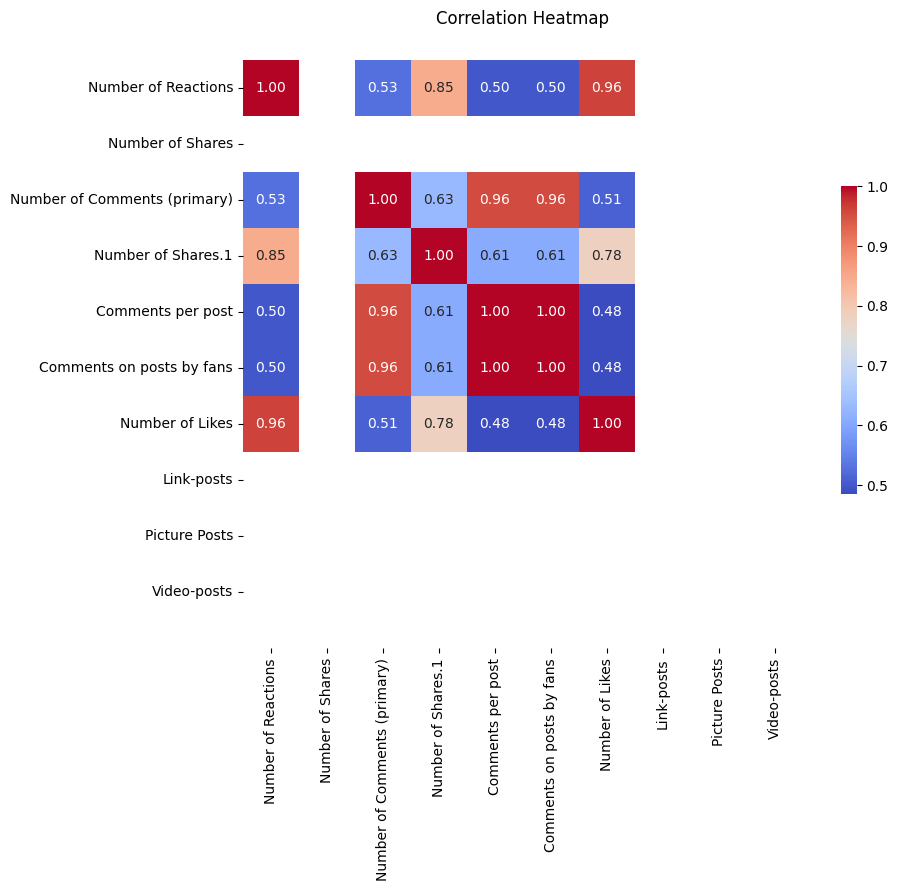

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_merged_df = merged_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_merged_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            cbar_kws={"shrink": .5}, square=True)

# Fix for matplotlib bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.title('Correlation Heatmap')
plt.show()
